## Q1. Import Libraries and create three multivariate normal distribution dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:
np.random.seed(7)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

## Q2. Combine all three in one dataset

In [4]:
#Combine all three arrays a,b,c into a dataframe
X = np.concatenate((a, b, c), axis=0)
print(X.shape)  # 250 samples with 2 dimensions

(250, 2)


## Q3. Use scatter matrix to print all the 3 distributions

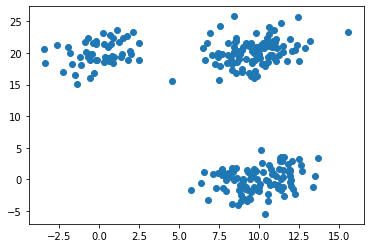

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Q4. Find out the linkage matrix

In [6]:
#Use ward as linkage metric and distance as Eucledian

In [7]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward', metric='euclidean')
Z.shape

(249, 4)

In [8]:
Z

array([[1.19000000e+02, 1.33000000e+02, 4.33368835e-02, 2.00000000e+00],
       [0.00000000e+00, 5.40000000e+01, 5.96909562e-02, 2.00000000e+00],
       [3.00000000e+00, 7.50000000e+01, 6.85654398e-02, 2.00000000e+00],
       [3.20000000e+01, 6.00000000e+01, 6.94379570e-02, 2.00000000e+00],
       [1.66000000e+02, 2.10000000e+02, 7.27622091e-02, 2.00000000e+00],
       [1.69000000e+02, 1.93000000e+02, 8.82555277e-02, 2.00000000e+00],
       [4.00000000e+00, 5.60000000e+01, 9.81068376e-02, 2.00000000e+00],
       [1.83000000e+02, 1.98000000e+02, 1.02380835e-01, 2.00000000e+00],
       [3.50000000e+01, 3.70000000e+01, 1.08572662e-01, 2.00000000e+00],
       [1.11000000e+02, 1.25000000e+02, 1.12985297e-01, 2.00000000e+00],
       [2.08000000e+02, 2.42000000e+02, 1.36285170e-01, 2.00000000e+00],
       [7.00000000e+01, 8.30000000e+01, 1.37589064e-01, 2.00000000e+00],
       [2.27000000e+02, 2.45000000e+02, 1.39451025e-01, 2.00000000e+00],
       [8.90000000e+01, 9.30000000e+01, 1.40722611e

## Q5. Plot the dendrogram for the consolidated dataframe

Recreate the dendrogram for last 12 merged clusters

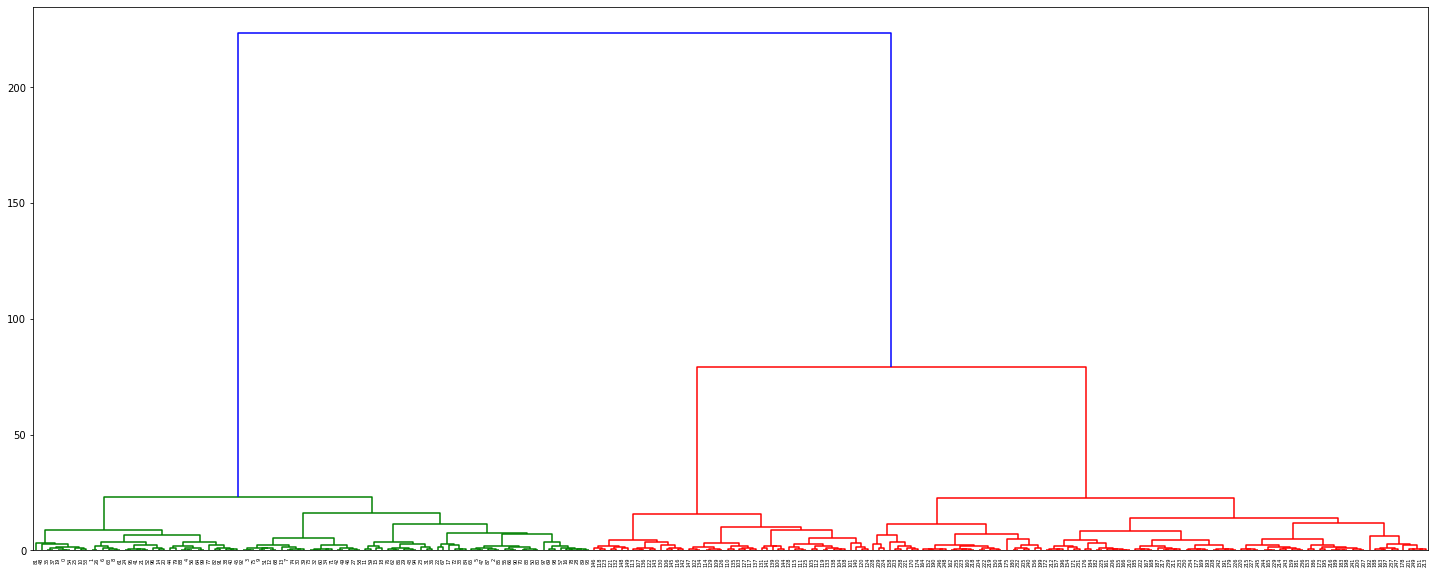

In [9]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

## Q6. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

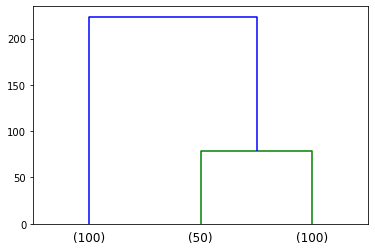

In [10]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [11]:
max_d = 50

## Q7. Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [12]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

## Q8. Use matplotlib to visually observe the clusters in 2D space

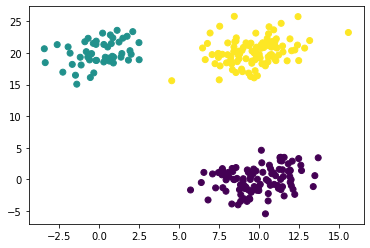

In [13]:
plt.scatter(X[:,0], X[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()

## Q9. Use sklearn Agglomerative Clustering and see how is it different from scipy.cluster.hierarchy

In [14]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [15]:
L=model.labels_
L

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

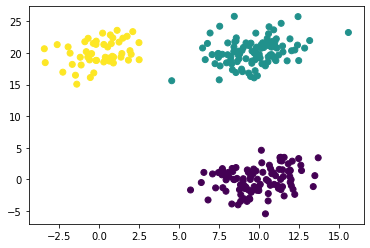

In [16]:
plt.scatter(X[:,0], X[:,1], c=L)  # plot points with cluster dependent colors
plt.show()

In [17]:
### Both are same, one is present in scikit learn library as Agglomerative Clustering and another in scipy library as hierarchy

## Agglomerative Clustering starts from 0 and hierarchy starts from 1

## Q10. Find the centroids of the clusters

In [18]:
x = pd.DataFrame(X,columns=['col_1','col_2'])
x['labels'] = model.labels_

In [22]:
c0 = x[x['labels']==0][['col_1','col_2']].mean().values
c0

array([ 9.93192138, -0.03172989])

In [23]:
c1 = x[x['labels']==1][['col_1','col_2']].mean().values
c1

array([ 9.66230672, 20.11463328])

In [24]:
c2 = x[x['labels']==2][['col_1','col_2']].mean().values
c2

array([-1.61159944e-02,  1.99974489e+01])

In [ ]:
# C0, C1 and C2 are the centroids of the clusters 0,1 and 2
# centroid of the cluster is the mean of all the features
# here there are only two features therefore centroid has 2 values.